# **EDA Heart Dataset**
**We will explore the Heart dataset and perform Exploratory Data Analysis on the dataset including the following topics:**


*   Removing duplicates
*   Missing value treatment
*   Outlier treatment
*   Normalisation and scaling(Numerical variables)
*   Encoding categorial variables(Dummy variables)
*   Univariate Analysis
*   Bivariate Analysis

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading and loading the data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
df = pd.read_csv("heart.csv")

#Basic Data Exploration

*   Head of the dataset
*   Shape of the dataset
*   Info of the dataset
*   Summary of the dataset

In [ ]:
df.head()  #first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape #rows & columns

(1025, 14)

In [ ]:
df.info() #datatypes, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe() #summarize stats (min, max, count)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


cp - Chest Pain

trestbps - Resting Blood Pressure

chol - Serum Cholestrol

fbs - Fasting Blood Sugar

restecg - Resting Electrocardiographic Results

thalach - Max Heart Rate Achieved

exang - Exercise Induced Angina

oldpeak - ST Depression

slope - Slope of peak exercise ST segment

ca - No. of major vessels colored by Fluoroscopy

thal - Thalassemia

target - Presence of Heart Disease

##Check for duplicates

In [ ]:
dups = df.duplicated()
print('Duplicate rows = %d' % (dups.sum()))
df[dups]

Duplicate rows = 723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##Drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Confirm after drop(removing) the duplicates

In [ ]:
dups = df.duplicated()
print('Duplicate rows = %d' % (dups.sum()))
df[dups]

Duplicate rows = 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df.shape #After dropping duplicates no. of rows have changed

(302, 14)

Earlier it was (1025, 14) now it has reduced to (302, 14)

##Outlier Treatment
Checking for outliers by plotting box plots

<Axes: >

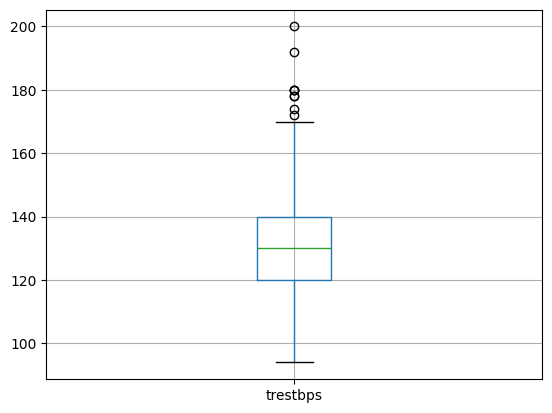

In [ ]:
df.boxplot(column = ['trestbps'])

<Axes: >

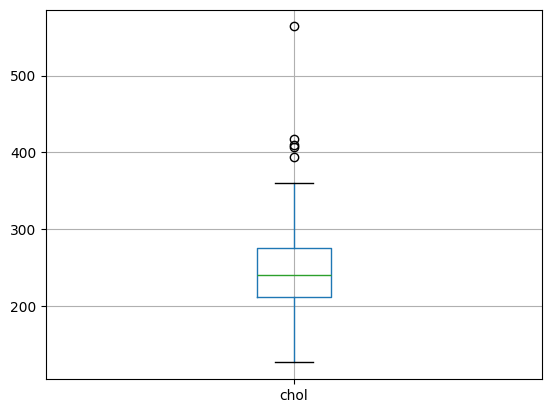

In [ ]:
df.boxplot(column = ['chol'])

<Axes: >

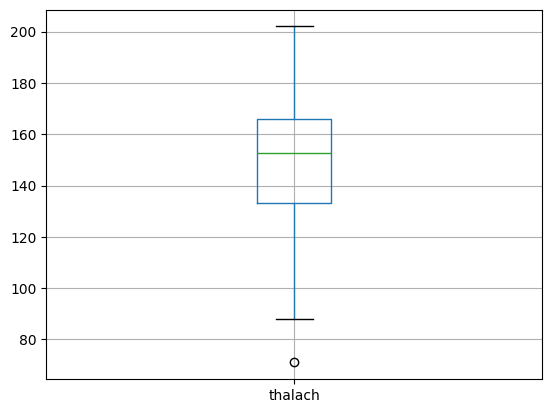

In [ ]:
df.boxplot(column = ['thalach'])

<Axes: >

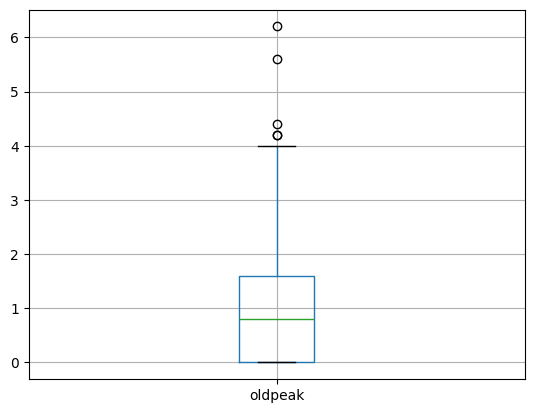

In [ ]:
df.boxplot(column = ['oldpeak'])

Outlier Treatment using IQR(Inter Quartile Range)

IQR = Q3 - Q1

where Q1 ranges from(0.00 to 0.25)

where Q3 ranges from (0.75 to 1.00)

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range


In [ ]:
lrtrestbps,urtrestbps = remove_outlier(df['trestbps'])
df['trestbps'] = np.where(df['trestbps'] > urtrestbps, urtrestbps, df['trestbps'])
df['trestbps'] = np.where(df['trestbps'] < lrtrestbps, lrtrestbps, df['trestbps'])
lrchol,urchol = remove_outlier(df['chol'])
df['chol'] = np.where(df['chol'] > urchol, urchol, df['chol'])
df['chol'] = np.where(df['chol'] < lrchol, lrchol, df['chol'])
lrthalach,urthalach = remove_outlier(df['thalach'])
df['thalach'] = np.where(df['thalach'] > urthalach, urthalach, df['thalach'])
df['thalach'] = np.where(df['thalach'] < lrthalach, lrthalach, df['thalach'])
lrthalach,urthalach = remove_outlier(df['oldpeak'])
df['oldpeak'] = np.where(df['oldpeak'] > urthalach, urthalach, df['oldpeak'])
df['oldpeak'] = np.where(df['oldpeak'] < lrthalach, lrthalach, df['oldpeak'])
df.shape #shape remains same as we treated not removed outliers

(302, 14)

###Boxplots after Outlier Treatment

<Axes: >

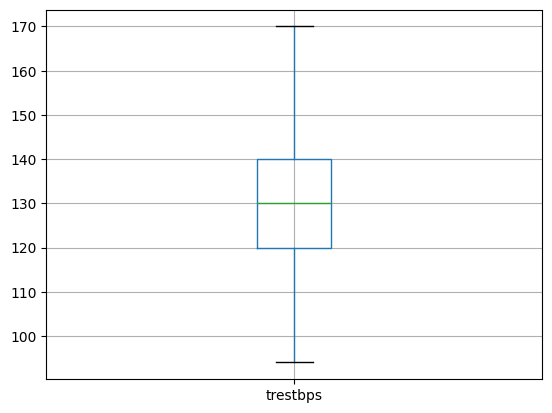

In [ ]:
df.boxplot(column = ['trestbps'])

<Axes: >

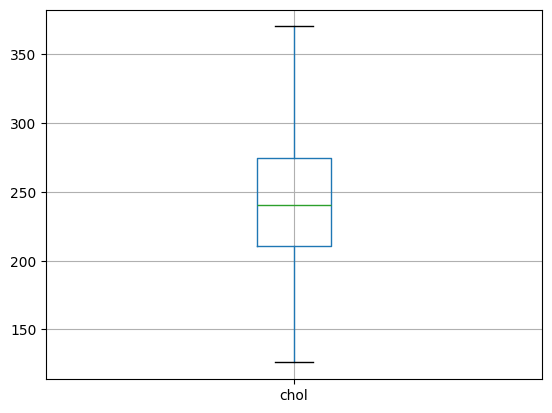

In [ ]:
df.boxplot(column = ['chol'])

<Axes: >

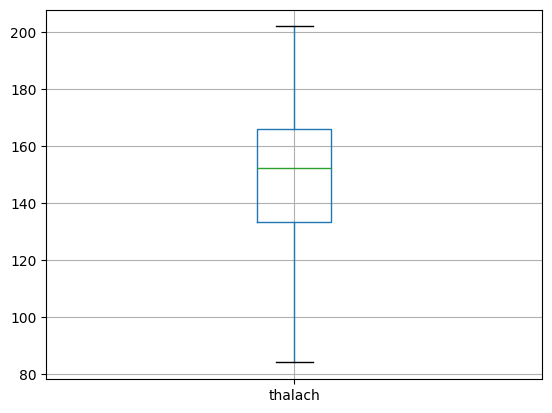

In [ ]:
df.boxplot(column = ['thalach'])

<Axes: >

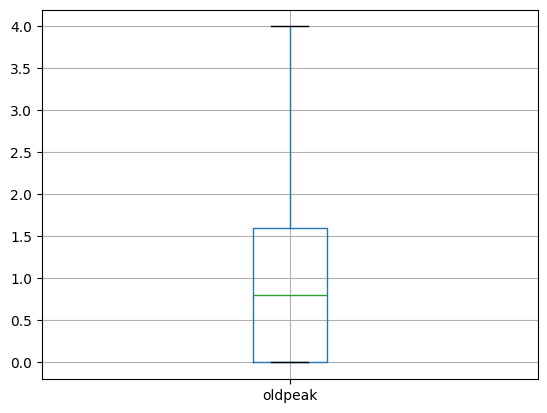

In [ ]:
df.boxplot(column = ['oldpeak'])

##Check for missing values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Here no missing values are there in the dataset.

If we had missing values:

For numerical: Use median as it is less affected by outliers

For categorical: Use mode as it is most common value

Mean is not used as it is sensitive to outliers

Replacing NULL values in Numerical Columns using Median

In [ ]:
'''
median = df["age"].median()
df["age"].replace(np.nan, median, inplace=True)
'''

'\nmedian = df["age"].median()\ndf["age"].replace(np.nan, median, inplace=True)\n'

Replacing NULL values in Categorical Columns using Mode

In [ ]:
'''
mode = df["sex"].mode().values[0]
df["sex"].replace(np.nan, mode)
'''

'\nmode = df["sex"].mode().values[0]\ndf["sex"].replace(np.nan, mode)\n'

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


##Univariate Analysis

<Axes: xlabel='trestbps', ylabel='Count'>

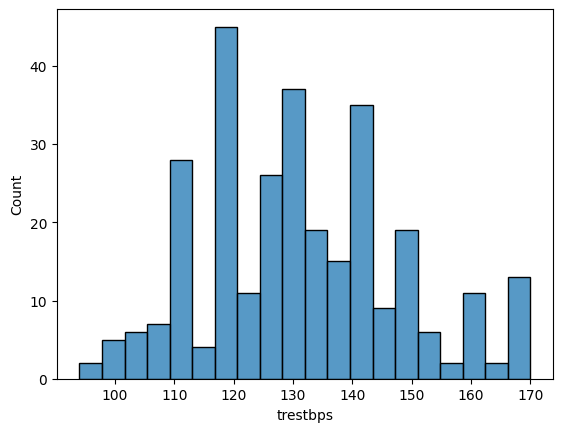

In [ ]:
sns.histplot(df.trestbps, bins = 20) #histogram

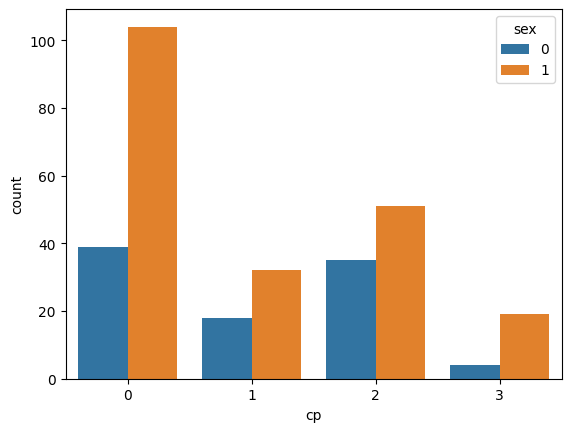

In [ ]:
sns.countplot(x='cp', hue='sex', data=df)
plt.show()


##Bivariate Analysis

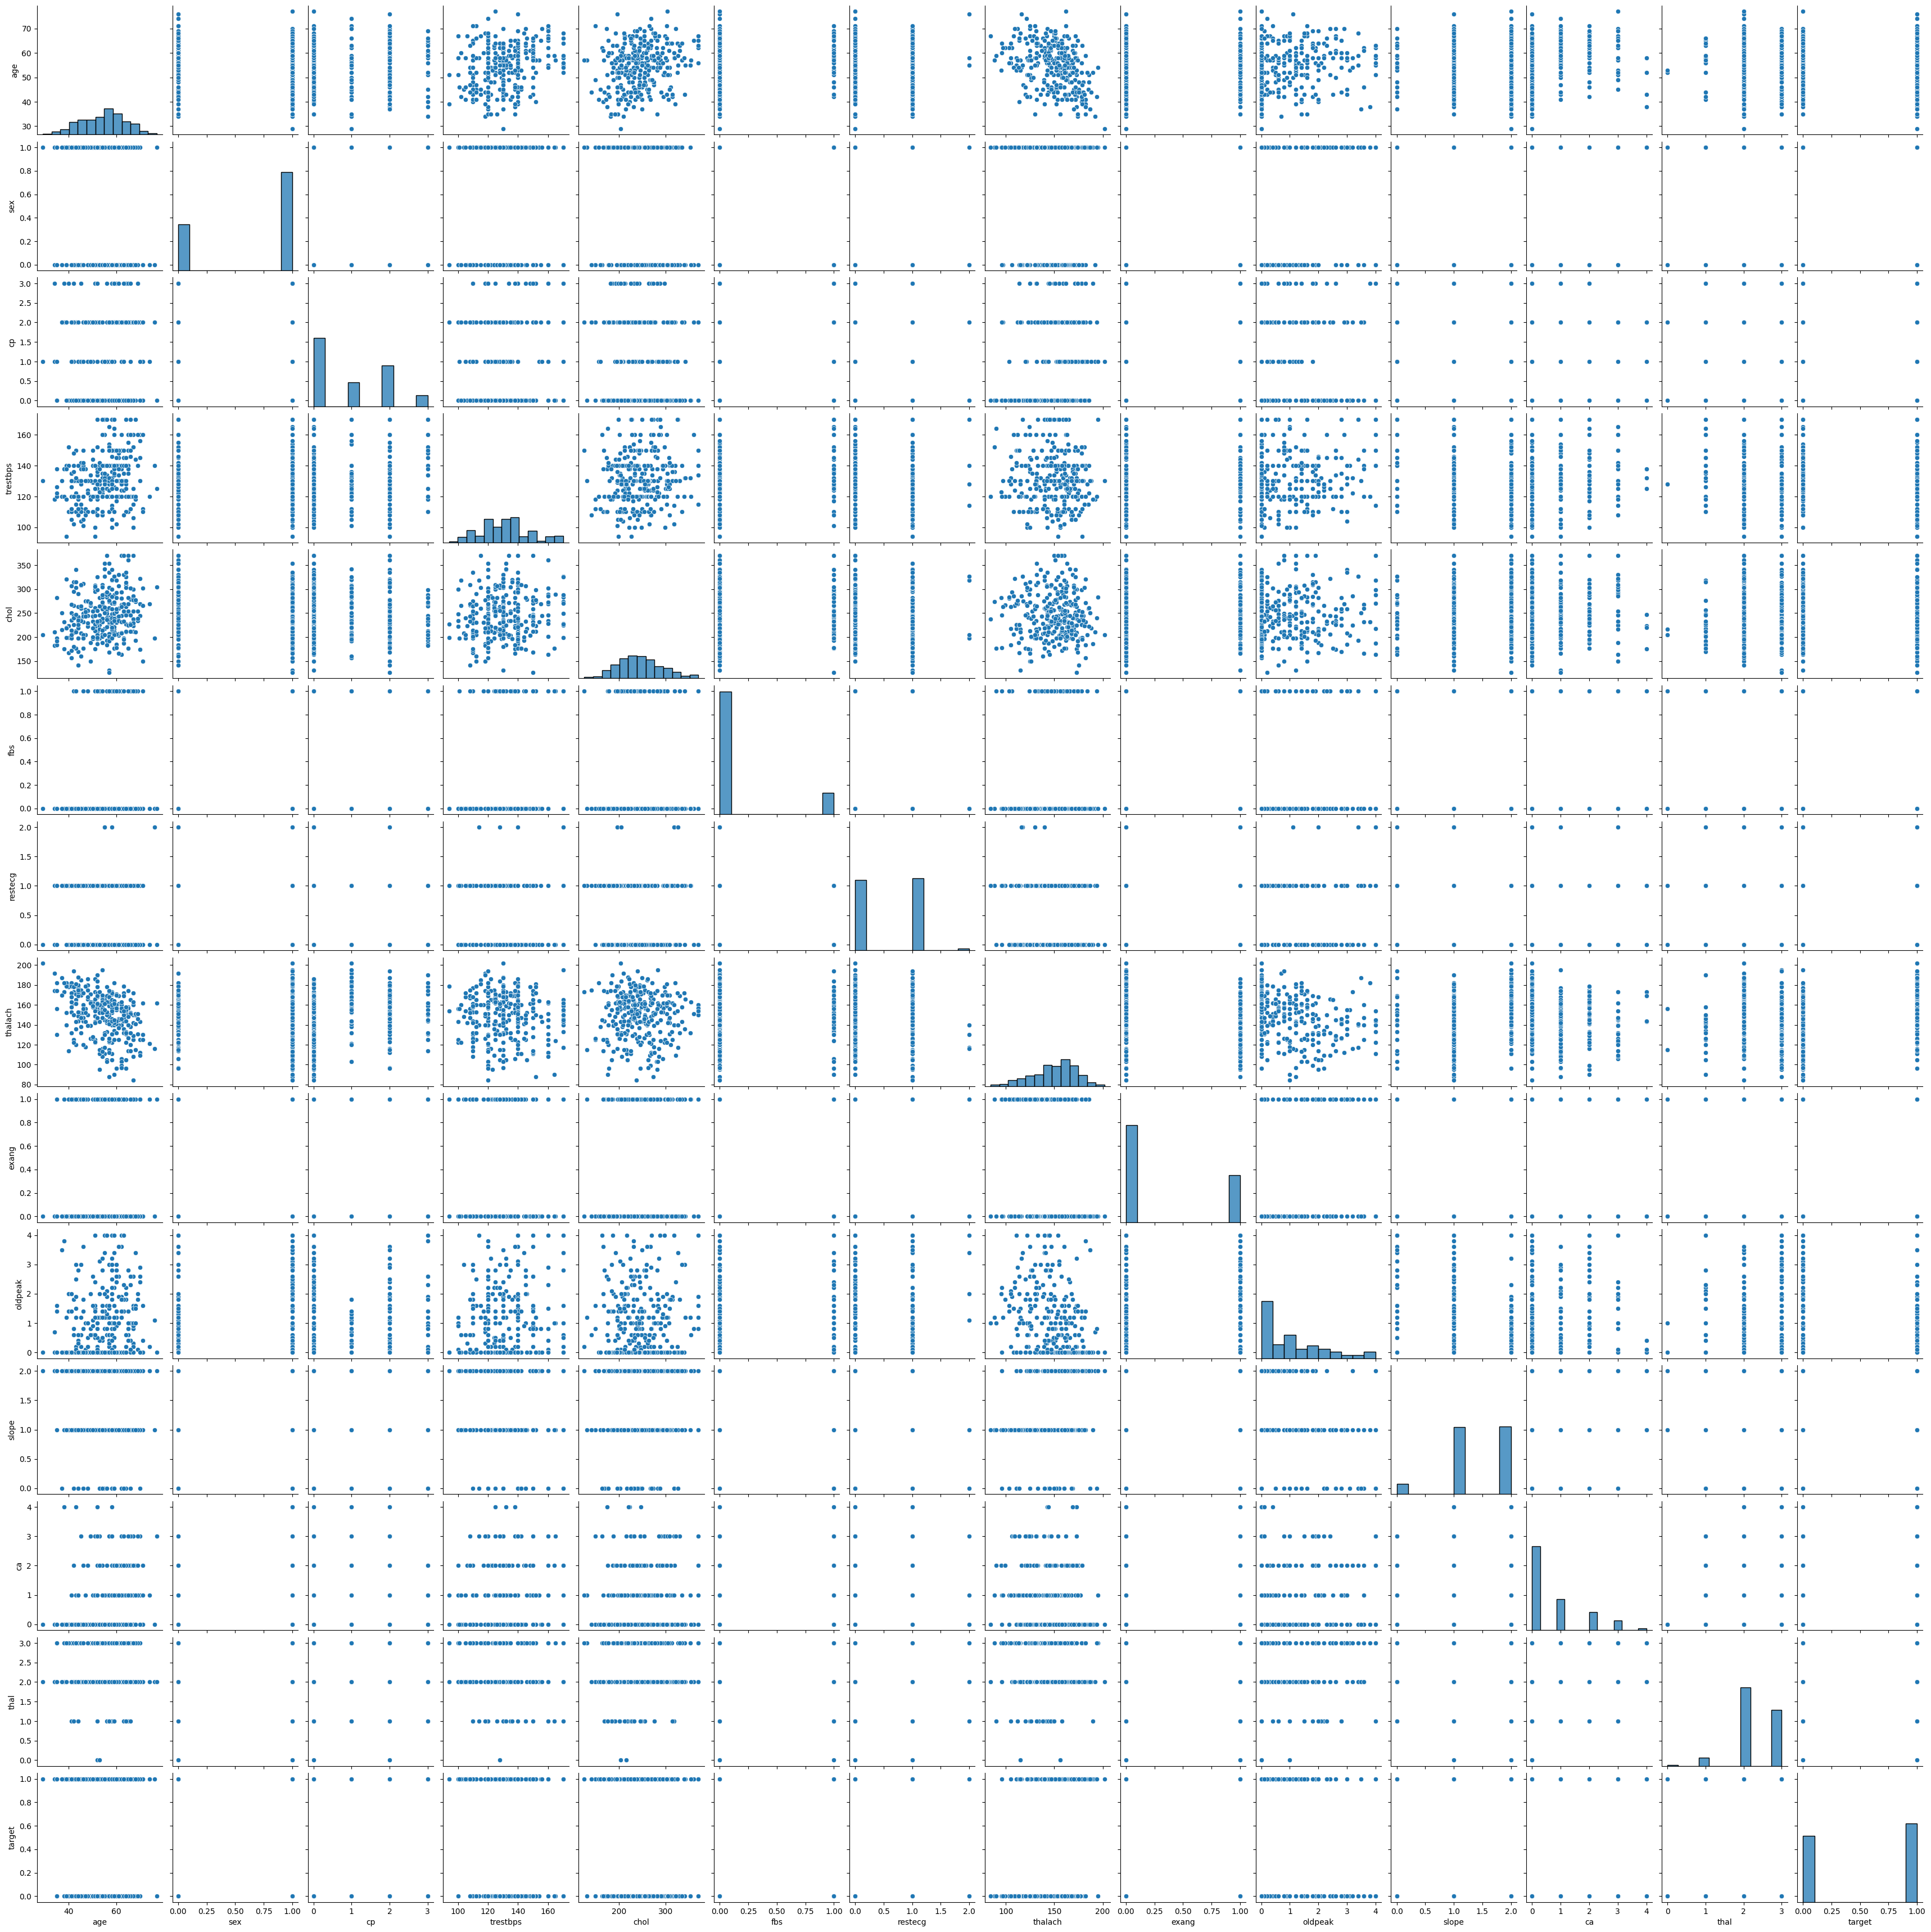

In [ ]:
sns.pairplot(df) #Visualizes pairwise relationships between multiple numerical variables in the dataset.
plt.show()

####Univariate analysis studies one variable at a time, while bivariate analysis studies the relationship between two variables.

In [ ]:
df.corr() #Computes the correlation between numeric columns in a dataframe
#Negative Correlation: When one variable increases, the other decreases.
#Positive Correlation: When one variable increases, the other also increases.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,0.119492,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,0.046022,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,0.096018,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,0.169049,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.100350,0.051065,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,0.013221,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.095374,0.086998,-0.099932
fbs,0.119492,0.046022,0.096018,0.169049,0.013221,1.000000,-0.083081,-0.008013,0.024729,0.010471,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,-0.083081,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,-0.008013,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.231057,-0.096466,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,0.024729,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,0.010471,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.232297,0.207221,-0.435099


##Correlation Heatmap

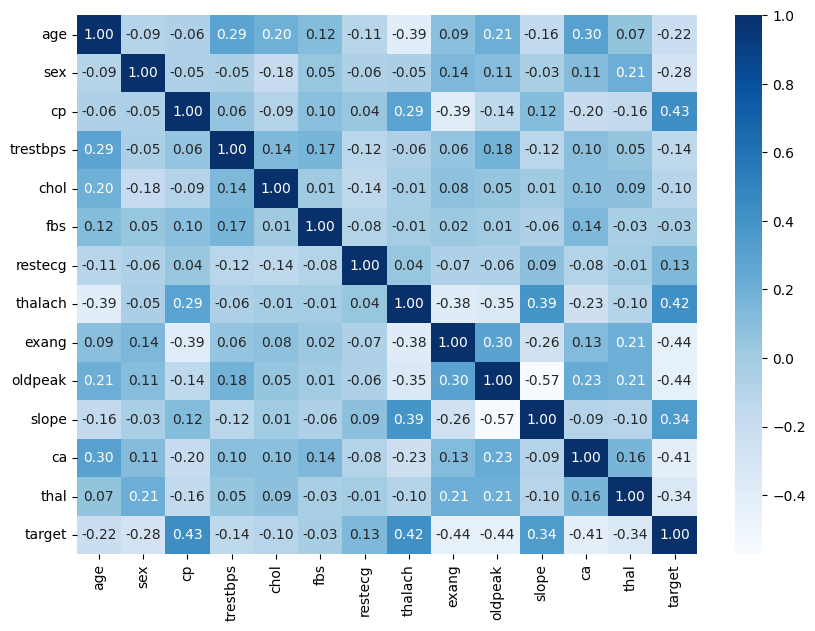

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

##Normalization and Scaling



Here we convert variables with different scalesof measurements into a single scale using standardscaler.
StandardScaler normalizes the data using formula (x-mean)/standard deviation.


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
#using z score z=(x-(mean))/(std deviation)


StandardScaler()

In [ ]:
df['age'] = std_scale.fit_transform(df[['age']])
df['trestbps'] = std_scale.fit_transform(df[['trestbps']])
df['chol'] = std_scale.fit_transform(df[['chol']])
df['thalach'] = std_scale.fit_transform(df[['thalach']])
df['oldpeak'] = std_scale.fit_transform(df[['oldpeak']])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.377511,-0.704039,0,1,0.808993,0,-0.025091,2,2,3,0
1,-0.157260,1,0,0.527318,-0.893880,1,0,0.237018,1,1.869266,0,0,3,0
2,1.724733,1,0,0.828927,-1.505591,0,1,-1.082925,1,1.418229,0,0,3,0
3,0.728383,1,0,1.009893,-0.893880,0,1,0.501006,0,-0.927166,2,1,3,0
4,0.839089,0,0,0.406674,1.025627,1,1,-1.918889,0,0.786777,1,3,2,0


#Encoding

One Hot Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using a 0 or 1 (as ML algorithms only work on numerical data) based on the presence or absence of the categorical value in the record
get_dummies to create dummy variable for each categorical variable.

In [ ]:
dummies = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], prefix = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)


In [ ]:
columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal']
df = pd.concat([df, dummies], axis=1)
df.drop(columns, axis = 1, inplace=True)

In [ ]:
df.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,target,age,trestbps,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,-0.377511,-0.704039,0,0.808993,0,-0.025091,0,-0.267966,-0.377511,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,0.527318,-0.893880,1,0.237018,1,1.869266,0,-0.157260,0.527318,...,False,False,False,False,False,False,False,False,False,True
2,1.724733,0.828927,-1.505591,0,-1.082925,1,1.418229,0,1.724733,0.828927,...,False,False,False,False,False,False,False,False,False,True
3,0.728383,1.009893,-0.893880,0,0.501006,0,-0.927166,0,0.728383,1.009893,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0.406674,1.025627,1,-1.918889,0,0.786777,0,0.839089,0.406674,...,False,True,False,False,False,True,False,False,True,False
